# Plotting DISCOVR EPIC Level-2 ozone product parameters

## Summary

This code graphs 4 different parameters from the DSCOVR EPIC Level 2 Total Ozone, Version 3 product
(Ozone, Reflectivity, Radiative Cloud Fraction, Cloud Pressure).

## Reference

Code Reference: [https://hdfeos.org/zoo/LaRC/DSCOVR_EPIC_L2_TO3_03_20210301005516_03.h5.py](https://hdfeos.org/zoo/LaRC/DSCOVR_EPIC_L2_TO3_03_20210301005516_03.h5.py)

For more information on this data product please vist:
[https://avdc.gsfc.nasa.gov/pub/DSCOVR/EPIC_Pulications/EPICTO3UserGuide_final.pdf](https://avdc.gsfc.nasa.gov/pub/DSCOVR/EPIC_Pulications/EPICTO3UserGuide_final.pdf)

## Note

By: Cheyenne Land

Tested using Python 3.8.10


## 1. Setup

In [ ]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## 2. Open and read data

In [ ]:
fn = 'DSCOVR_EPIC_L2_TO3_03_20210402092724_03.h5'
with h5py.File(fn, mode='r') as f:
    ozone = '/Ozone'
    dataozone = f[ozone][:].astype(np.float64)
    reflectivity = '/Reflectivity'
    datareflectivity = f[reflectivity][:].astype(np.float64)
    RCF = '/RadiativeCloudFraction'
    dataRCF = f[RCF][:].astype(np.float64)
    CP = '/CloudPressure'
    dataCP = f[CP][:].astype(np.float64)
    lat = f['/Latitude'][:]
    lon = f['/Longitude'][:]

## 3. Set fill value for each variable

In [ ]:
FillValue = -999.0

dataozone[dataozone == FillValue] = np.nan
dataozone = np.ma.masked_where(np.isnan(dataozone), dataozone)

datareflectivity[datareflectivity == FillValue] = np.nan
datareflectivity = np.ma.masked_where(np.isnan(datareflectivity), datareflectivity)

dataRCF[dataRCF == FillValue] = np.nan
dataRCF = np.ma.masked_where(np.isnan(dataRCF), dataRCF)

dataCP[dataCP == FillValue] = np.nan
dataCP = np.ma.masked_where(np.isnan(dataCP), dataCP)

## 4. Find middle location

In [ ]:
lat_m = lat[int(lat.shape[0]/2),int(lat.shape[1]/2)]
lon_m = lon[int(lon.shape[0]/2),int(lon.shape[1]/2)]

fig = plt.figure(figsize=(12,9.5), dpi=300)

## 5. Plot the data

In [ ]:
orth = ccrs.Orthographic(central_longitude=lon_m,
                         central_latitude=lat_m,
                         globe=None)

ax1 = fig.add_subplot(221, projection=orth)
im1 = ax1.scatter(lon, lat, c=dataozone, s=1, cmap=plt.cm.jet,
                transform=ccrs.PlateCarree())
ax1.coastlines()
gl = ax1.gridlines()
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
cb1 = plt.colorbar(im1, fraction=0.022, pad=0.01)
cb1.set_label('DU', fontsize=10)
ax1.set_title('Ozone', size = 10)

ax2 = fig.add_subplot(222, projection=orth)
im2 = ax2.scatter(lon, lat, c=datareflectivity, s=1, cmap=plt.cm.jet,
                transform=ccrs.PlateCarree())
ax2.coastlines()
g2 = ax2.gridlines()
g2.top_labels = False
g2.right_labels = False
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER
cb2 = plt.colorbar(im2, fraction=0.022, pad=0.01)
ax2.set_title('Reflectivity', size = 10)

ax3 = fig.add_subplot(223, projection=orth)
im3 = ax3.scatter(lon, lat, c=dataRCF, s=1, cmap=plt.cm.jet,
                transform=ccrs.PlateCarree())
ax3.coastlines()
g3 = ax3.gridlines()
g3.top_labels = False
g3.right_labels = False
g3.xformatter = LONGITUDE_FORMATTER
g3.yformatter = LATITUDE_FORMATTER
cb3 = plt.colorbar(im3, fraction=0.022, pad=0.01)
ax3.set_title('Radiative Cloud Fraction', size = 10)

ax4 = fig.add_subplot(224, projection=orth)
im4 = ax4.scatter(lon, lat, c=dataCP, s=1, cmap=plt.cm.jet,
                transform=ccrs.PlateCarree())
ax4.coastlines()
g4 = ax4.gridlines()
g4.top_labels = False
g4.right_labels = False
g4.xformatter = LONGITUDE_FORMATTER
g4.yformatter = LATITUDE_FORMATTER
cb4 = plt.colorbar(im4, fraction=0.022, pad=0.01)
ax4.set_title('Cloud Pressure', size = 10)


plt.suptitle('DSCOVR_EPIC_L2_TO3_03_20210402092724_03', fontsize=10)
plt.savefig('DSCOVR_EPIC_L2_TO3_03_20210402092724_03.png', dpi=200)
plt.close()

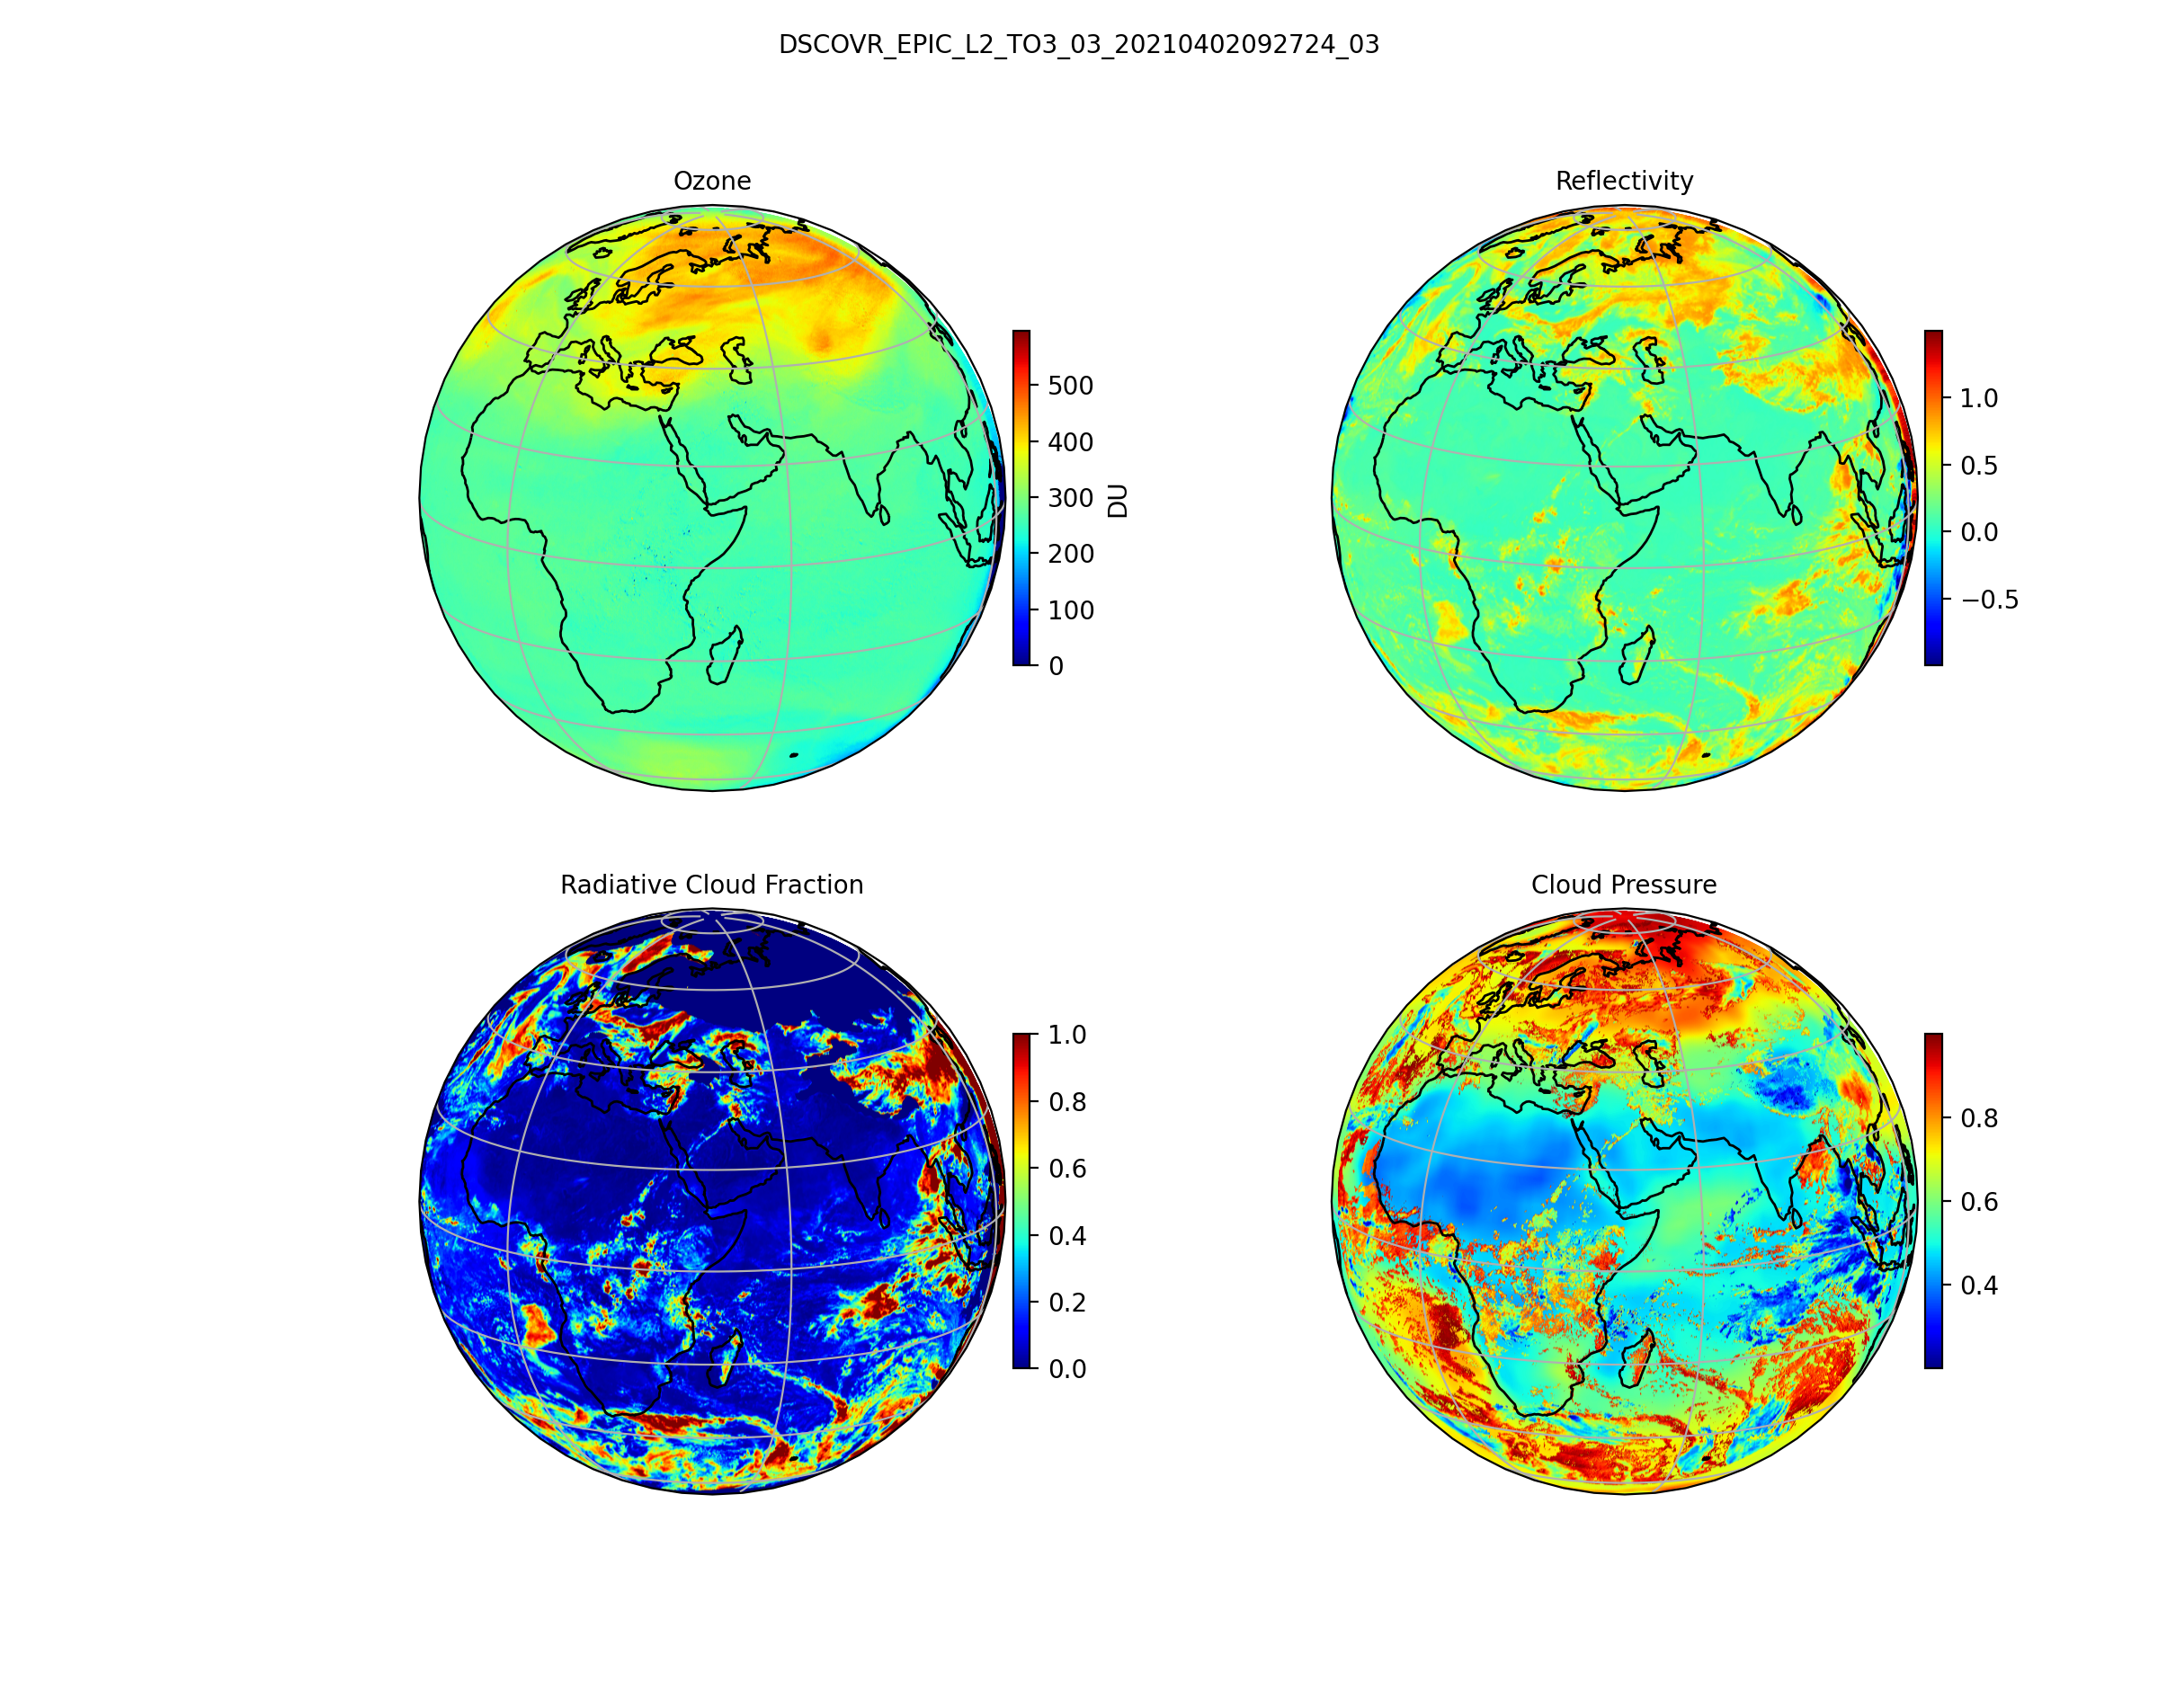